<a href="https://colab.research.google.com/github/deathreaper17/C-Plus-Plus/blob/master/Citrus_plant_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.applications.imagenet_utils import decode_predictions
import keras
import tensorflow as tf
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
import os
import matplotlib.pyplot as plt
#from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
#from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.applications.resnet import ResNet, preprocess_input,decode_predictions
from keras.preprocessing.image import ImageDataGenerator , img_to_array,load_img

In [ ]:
train_path='/content/drive/MyDrive/Citrus/Fruits'
valid_path='/content/drive/MyDrive/Citrus/Fruits'

In [ ]:
len(os.listdir("/content/drive/MyDrive/Citrus/Fruits"))

5

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=(preprocess_input),
    rotation_range = 30,
   shear_range = 0.2,
    zoom_range = 0.2,
      horizontal_flip = True,
   #fill_mode = 'nearest',
    validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=(preprocess_input)
)

In [ ]:
train= train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Citrus/Fruits",target_size=(256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Citrus/Fruits",target_size=(256,256),batch_size=32)


Found 150 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [ ]:
t_img , label=train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/180)
    plt.show()

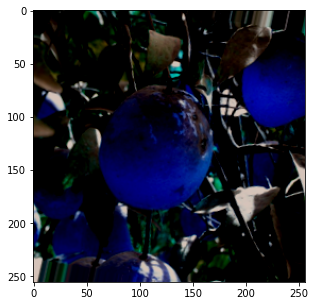

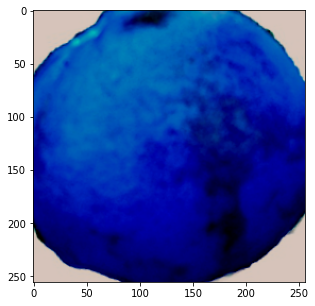

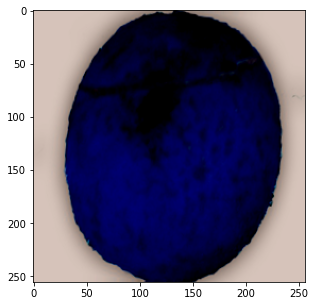

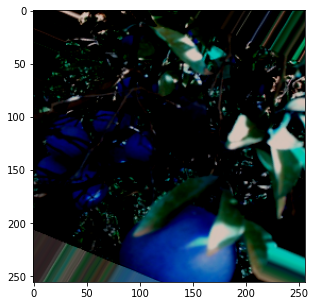

In [ ]:
plotImage(t_img[:4],label[:4])

Building MODel


In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
#from keras.applications import resnet
#from keras.applications.vgg19 import VGG19
import keras

In [ ]:
model1=VGG19(input_shape=(256,256,3),include_top=False)           

In [ ]:
for layer in model1.layers:
 layer.trainable=False

In [ ]:
model1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
from keras import activations
X=Flatten()(model1.output)
X=Dense(units=5, activation="softmax")(X)


In [ ]:
model=Model(model1.input,X)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=["accuracy"])

In [ ]:
#from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
#es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,verbose=1)
#model check point
#@mc=ModelCheckpoint(filepath="best_model.h5",
#                   min_delta=0.01,
                   
  #                 verbose=1,
 #                  save_best_only=True)
#cb=[es,mc]

In [ ]:
his=model.fit_generator(train,
                     
                        epochs=50,
                    
                   
                        validation_data=val
                        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
5/5 [==============================] - 6s 1s/step - loss: 0.5572 - accuracy: 0.9867 - val_loss: 0.2740 - val_accuracy: 0.9933
Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 0.7245 - accuracy: 0.9800 - val_loss: 0.9986 - val_accuracy: 0.9933
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 0.0643 - accuracy: 0.9933 - val_loss: 1.4117 - val_accuracy: 0.9933
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 0.3524 - accuracy: 0.9933 - val_loss: 1.5828 - val_accuracy: 0.9933
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.5745 - accuracy: 0.9933 - val_loss: 1.0465 - val_accuracy: 0.9933
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.0402 - accuracy: 0.9933 - val_loss: 0.6113 - val_accuracy: 0.9933
Epoch 7/50
5/5 [==============================] - 6s 1s/step - loss: 1.3510e-08 - accuracy: 1.0000 - val_loss: 0.3518 - val_accuracy: 0.9933
Epoch 8/50
5/5 [=====================

In [ ]:
h=his.history

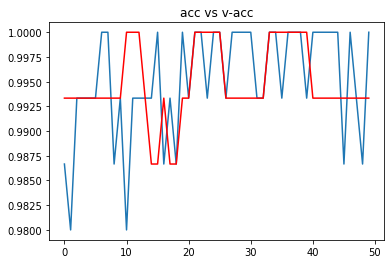

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

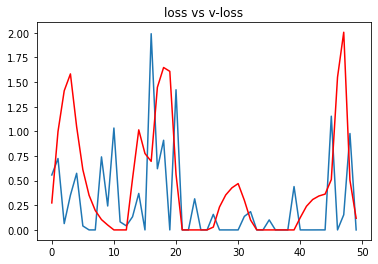

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#!pip uninstall -y Pillow
#!pip install Pillow==7.1.2
#import PIL.Image